In [32]:
# Program to read in pkl files containing data from a long
# obseration with the SNAPs at the ATA. This example shows 
# processing three antennas, 6 pols, and the data. Edit the 
# code to fit your needs.
#
# Author: Jon Richards, SETI Institute
# Date: June 28, 2019
#

In [45]:
import sys
import os
import glob
import pickle
import numpy as np, scipy.io
import math
from pylab import rcParams
import pylab as plt
import matplotlib.dates as mdates
from datetime import datetime

In [46]:
# Define the ants to use
ant1 = '2j'
ant2 = '2h'
ant3 = '5c'

#Define your data and output images directory
data_dir = "/data/onoff/20190817" # Copy the pkl data files into here
images_dir = "/data/images"
sql_dir = "/data/onoff/sql"

In [47]:
# Get the list of files

file_list1 = glob.glob(data_dir + "/*" + ant1 + "*.pkl")
file_list1.sort() # The first field is the timestamp, order by time
file_list2 = glob.glob(data_dir + "/*" + ant2 + "*.pkl")
file_list2.sort() # The first field is the timestamp, order by time
#file_list3 = glob.glob(data_dir + "/*" + ant3 + "*.pkl")
#file_list3.sort() # The first field is the timestamp, order by time
print("There are %d files to process." % (len(file_list1) + len(file_list2)))
#print("There are %d files to process." % (len(file_list1) + len(file_list2) + len(file_list3)))

#for fname in file_list1[0:len(file_list1)]:
#    print(fname)
#for fname in file_list2:
#    print(fname)
#for fname in file_list3:
#    print(fname)

There are 382 files to process.


In [48]:
#Create the lists to store the data
power1_x = list()
power1_y = list()
power2_x = list()
power2_y = list()
#power3_x = list()
#power3_y = list()

channels1_x = list()
channels2_x = list()
channels3_x = list()
channels1_y = list()
#channels2_y = list()
#channels3_y = list()

#This is a list of times for each data point, read in 
#from the first set of file.
times = list()
def getDesiredChannels(data):
    #return list(data[768:1700][0:150]) + list(data[768:1700][300:-1])
    #return list(data[768:1700][500:600])
    #d1 = list(data[918:])
    return list(data[768:1700])
    #d = d1 + d2
    #return d
    
def getDesiredChannels2(data):
    return data[768:1700]
    
def values2dB(data):
    return 10*np.log10(data)
    #return data

def getMedian(data):
    #return np.max(data)
    return np.median(data)
    
first = True

print("Reading in data - this takes a while if you have a lot of files...")

int1 = 0
int2 = len(file_list1)
int2 = 1

for fname in file_list1[int1:int2]:
    
    print("Processing file: " + fname)
    
    f = open(fname,'r')
    data = pickle.load(f)
    
    # Create one big list of unix timestamps for each data point
    times.extend(data['auto0_timestamp'])

    for d in data['auto0']:
        if first:
            channels1_x = list(values2dB(getDesiredChannels2(d)))
        power1_x.append(getMedian(values2dB(getDesiredChannels(d))))
       
    for d in data['auto1']:
        if first:
            channels1_y = list(values2dB(getDesiredChannels2(d)))
            first = False
        power1_y.append(getMedian(values2dB(getDesiredChannels(d))))
   

first = True
for fname in file_list2[int1:int2]:
    
    print("Processing file: " + fname)
    
    f = open(fname,'r')
    data = pickle.load(f)
    
    for d in data['auto0']:
        if first:
            channels2_x = list(values2dB(getDesiredChannels2(d)))
        power2_x.append(getMedian(values2dB(getDesiredChannels(d))))

    for d in data['auto1']:
        if first:
            channels2_y = list(values2dB(getDesiredChannels2(d)))
            first = False
        power2_y.append(getMedian(values2dB(getDesiredChannels(d))))
  
"""
first = True
for fname in file_list3[int1:int2]:
    
    print("Processing file: " + fname)
    
    f = open(fname,'r')
    data = pickle.load(f)
    
    for d in data['auto0']:
        if first:
            channels3_x = list(values2dB(getDesiredChannels2(d)))
        power3_x.append(getMedian(values2dB(getDesiredChannels(d))))
    for d in data['auto1']:
        if first:
            channels3_y = list(values2dB(getDesiredChannels2(d)))
            first = False
        power3_y.append(getMedian(values2dB(getDesiredChannels(d))))
"""
print("Reading in data - Finished")

#For sanity, print out how many data points there are
#for each pol. They should all be the same.
print(len(power1_x),len(power1_y))
print(len(power2_x),len(power2_y))
#print(len(power3_x),len(power3_y))


    

Reading in data - this takes a while if you have a lot of files...
Processing file: /data/onoff/20190817/1566007955_rf400.00_n1000_north_2j_on_weekend_obsid10000009_400mhz_1.pkl
Processing file: /data/onoff/20190817/1566007958_rf400.00_n1000_north_2h_on_weekend_obsid10000009_400mhz_1.pkl
Reading in data - Finished
(1000, 1000)
(1000, 1000)


In [49]:
#d = datetime.datetime.strptime('2018-07-01 22:33:01', '%Y-%m-%d %H:%M:%S').date()
#print(d.minute)

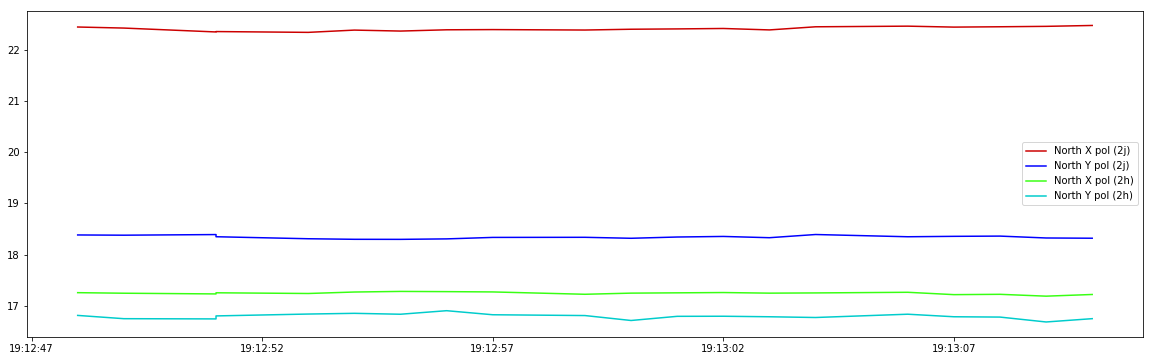

In [50]:
#Convert the list of times from unix timestamp to Datetime objects.
timesd = list()
for ts in times:
    timesd.append(datetime.fromtimestamp(int(ts)))
rcParams['figure.figsize'] = 20, 6

start = 0
stop = 20
plt.plot(timesd[start:stop], power1_x[start:stop], c='#cc0000', label='North X pol (2j)')
plt.plot(timesd[start:stop], power1_y[start:stop], c='#0000ff', label='North Y pol (2j)')
plt.plot(timesd[start:stop], power2_x[start:stop], c='#39ff14', label='North X pol (2h)')
plt.plot(timesd[start:stop], power2_y[start:stop], c='#00cccc', label='North Y pol (2h)')
#plt.plot(timesd[start:stop], power3_x[start:stop], c='#000000', label='North X pol (5c)')
#plt.plot(timesd[start:stop], power3_y[start:stop], c='#dd88aa', label='North Y pol (5c)')

plt.legend()

#If you want to create an image file...
#plt.savefig(images_dir + '/2j2h-42300-42315-11sec-dips-2h.png')
#plt.savefig(images_dir + '/2j2h-42300-42315-11sec-dips-2h.png')
#plt.savefig(images_dir + '/2j2h-41900-42300-dips-rfi.png')
#plt.savefig(images_dir + '2j2h.png')

plt.show()

In [30]:
"""
def create_sql(ant, timestamps, power_x, power_y):
 
    f = open(sql_dir + "/" + "20190817_" + ant + ".sql", "w")
    sql = "insert into rfi_scan_pwr (ts,ant,xpol,ypol) values \n"
    last_ts = -1
    for i, ts in enumerate(timestamps):
        if last_ts != -1 and int(ts) >= int(last_ts)+1:
            while int(ts) != int(last_ts)+1:
                td = datetime.fromtimestamp(last_ts+1)
                sql += "(FROM_UNIXTIME(%.2f),'%s',%.2f,%.2f),\n" % (last_ts+1.0, ant, power_x[i], power_y[i])
                last_ts += 1
        td = datetime.fromtimestamp(int(ts))
        sql += "(FROM_UNIXTIME(%.2f),'%s',%.2f,%.2f),\n" % (ts, ant, power_x[i], power_y[i])
        last_ts = ts
    sql = sql[:-2]    
    sql += ";\n"
    f.write(sql)
    f.close()
    
    print(sql)

start = 0
stop = -1
#create_sql('2j', times[start:stop], power1_x[start:stop], power1_y[start:stop])
#create_sql('2h', times[start:stop], power2_x[start:stop], power2_y[start:stop])
"""

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(1000, 932)
(1000, 932)


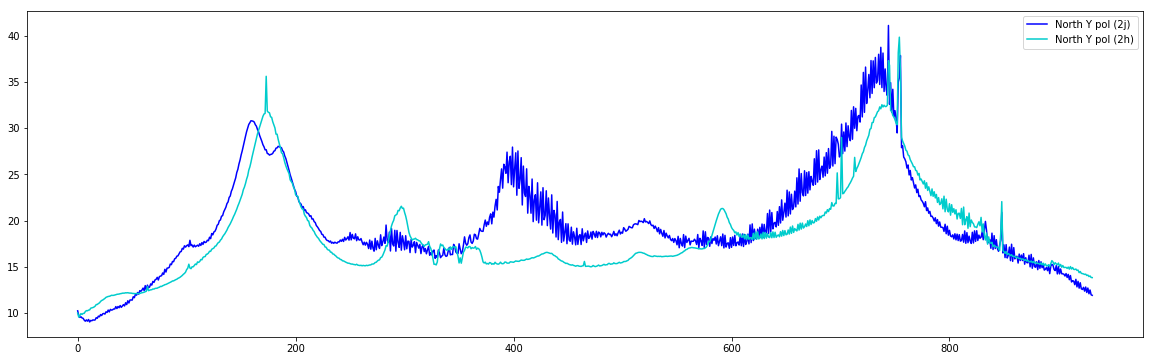

In [51]:
plt.figure(1)
rcParams['figure.figsize'] = 20, 6
print(len(timesd), len(channels1_x))
print(len(timesd), len(channels2_x))
#print(len(timesd), len(channels3_x))

#plt.plot(channels1_x, c='#cc0000', label='North X pol (2j)')
plt.plot(channels1_y, c='#0000ff', label='North Y pol (2j)')
#plt.plot(channels2_x, c='#39ff14', label='North X pol (1a)')
plt.plot(channels2_y, c='#00cccc', label='North Y pol (2h)')
#plt.plot(channels3_x, c='#000000', label='North X pol (5c)')
#plt.plot(channels3_y, c='#dd88aa', label='North Y pol (5c)')

plt.legend()
plt.show()